In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calcula_ticks(lista,barras):
    lista.sort()
    menor_valor = lista[0]
    maior_valor = lista[-1]
    intervalo = (maior_valor - menor_valor)/barras
    ticks = [menor_valor]
    ultimo = menor_valor+intervalo
    ticks.append(ultimo)
    for x in range(barras-1):
        ultimo += intervalo
        ticks.append(ultimo)
    return ticks

In [3]:
km = pd.Series([4,6,6,7,11,13,18,19,21,24,26,27,35,36,36,42,43,45,49])

In [4]:
def pct(x):
    return "{0:.2f}%".format(x*100)

In [5]:
def frequencia_relativa(total,yticks):
    freq_rel = []
    for item in yticks:
        x = item/total
        freq_rel.append(pct(x))
    return freq_rel

In [6]:
def gera_histograma(barras,data_series,titulo,unidade):
    lista = data_series.values
    ax = data_series.plot.hist(bins=barras,rwidth=0.95)

    yticks = ax.get_yticks()
    total = len(lista)
    freq_rel = frequencia_relativa(total,yticks)
    ax.set_yticklabels(freq_rel)
    
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    fig.set_dpi(150)

    ticks = calcula_ticks(lista,barras)
    plt.xticks(ticks)
    plt.title(titulo)
    plt.xlabel(unidade)
    plt.ylabel('Frequência')
    plt.grid(axis='y')

C:\Users\phill\AppData\Local\Temp\ipykernel_2028\309048734.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


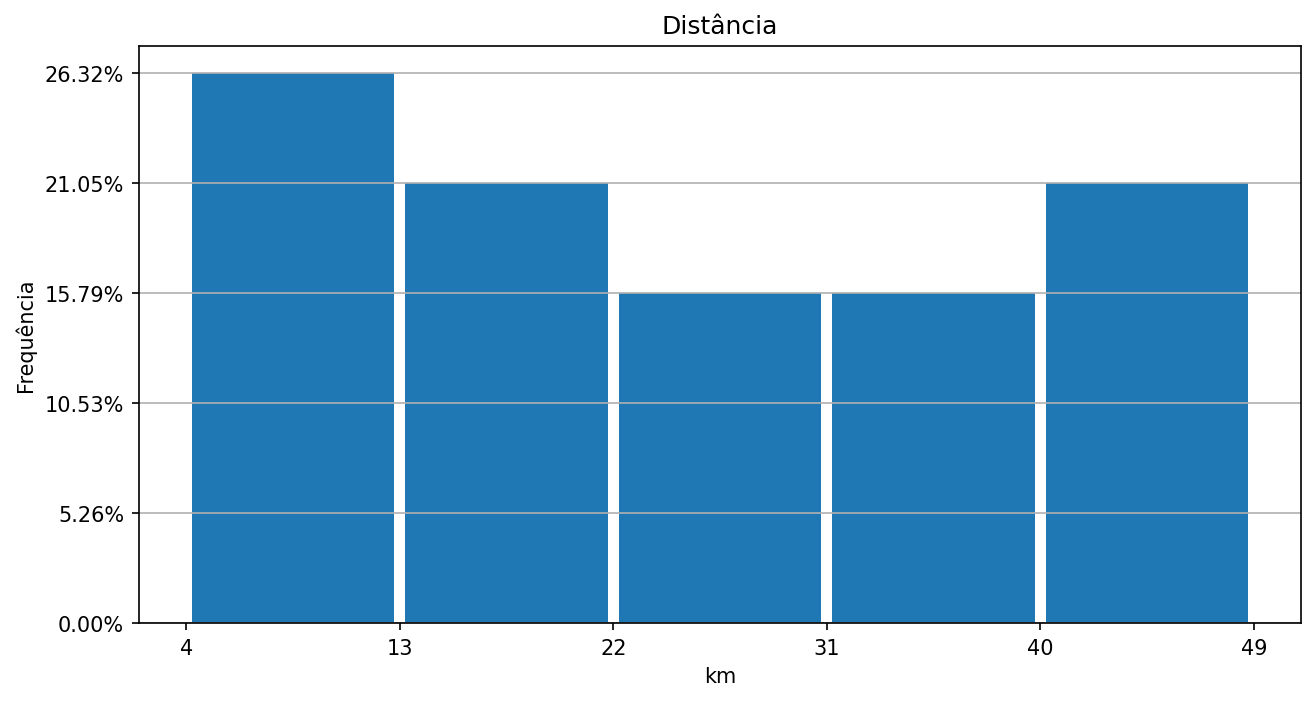

In [7]:
gera_histograma(5,km,'Distância','km')

In [8]:
import pandas as pd

In [11]:
data = pd.read_csv('wh.csv')

In [12]:
data['Altura cm'] = data['Height']*2.54

In [13]:
data['Altura cm'] = data['Altura cm'].round(0)

In [14]:
data['Peso kg'] = data['Weight']*0.453592

In [15]:
data['Peso kg'] = data['Peso kg'].round(1)

In [16]:
peso_mulheres = data.loc[data['Gender']=='Female']['Peso kg']

In [17]:
peso_homens = data.loc[data['Gender']=='Male']['Peso kg']

In [18]:
altura_mulheres = data.loc[data['Gender']=='Female']['Altura cm']

In [19]:
altura_homens = data.loc[data['Gender']=='Male']['Altura cm']

C:\Users\phill\AppData\Local\Temp\ipykernel_2028\309048734.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


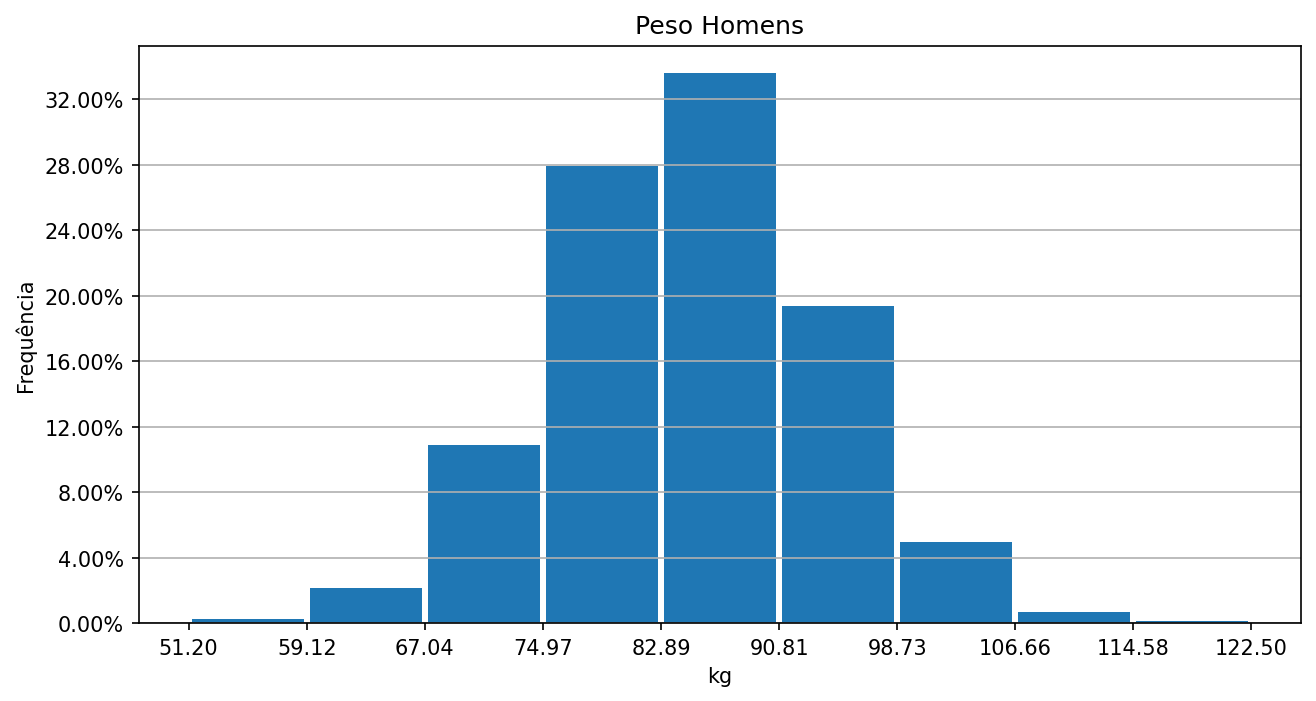

In [20]:
gera_histograma(9,peso_homens,'Peso Homens','kg')

C:\Users\phill\AppData\Local\Temp\ipykernel_2028\309048734.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


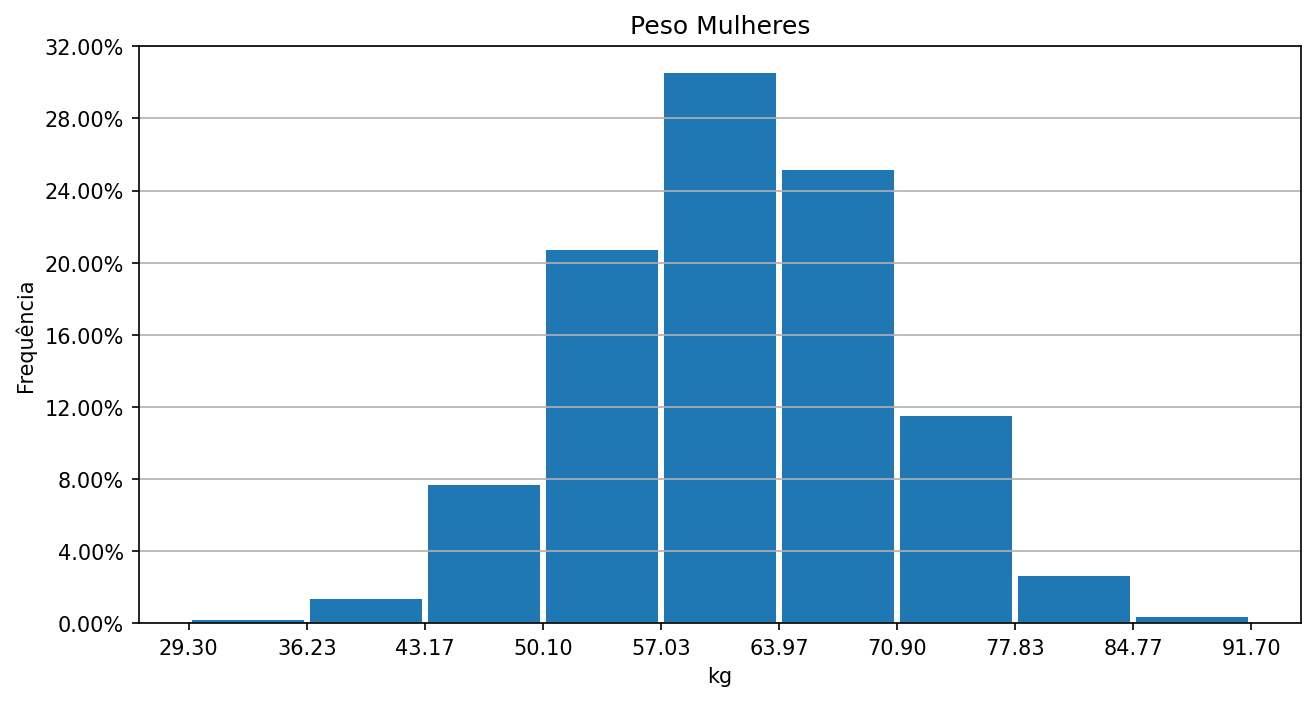

In [21]:
gera_histograma(9,peso_mulheres,'Peso Mulheres','kg')

C:\Users\phill\AppData\Local\Temp\ipykernel_2028\309048734.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


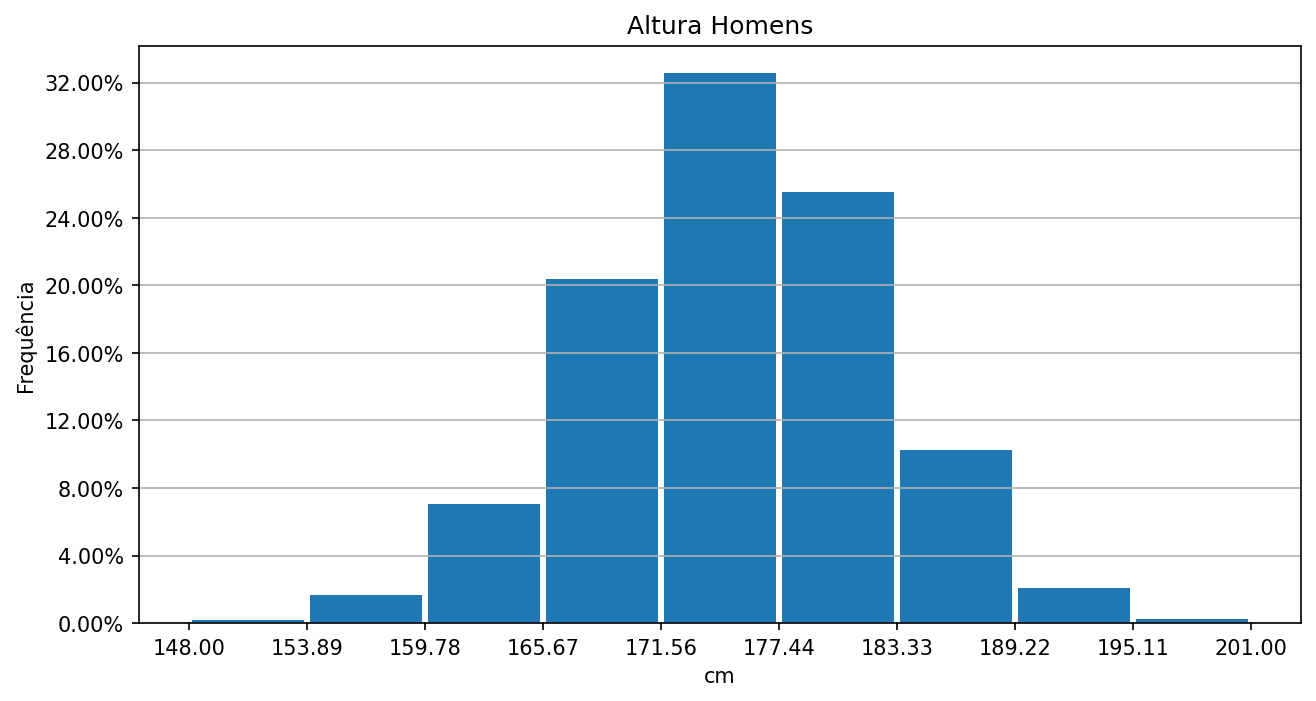

In [22]:
gera_histograma(9,altura_homens,'Altura Homens','cm')

In [23]:
data.head() #polegada para cm *2.54

,Gender,Height,Weight,Altura cm,Peso kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [24]:
import statistics as stats

# Média
Somatório de valores de determinados elementos dividido pela quantidade de elementos somados.

In [25]:
stats.mean(altura_homens)

175.327

# Mediana
Dada uma sequência de valores ordenados em ordem crescente ou decrescente, a mediana é o valor central dessa sequência. Caso haja dois valores centrais, a mediana é dada pela média aritmética deles.

In [26]:
stats.median(altura_homens)

175.0

# Moda
Dado um conjunto de valores, a moda é o número que mais se repete.

In [27]:
stats.mode(altura_homens)

175.0

In [28]:
len(altura_homens)

5000

In [29]:
cinco = altura_homens.head()
cinco

0    148.0
1    151.0
2    152.0
3    152.0
4    152.0
Name: Altura cm, dtype: float64

In [30]:
media = stats.mean(cinco)
media

151.0

In [31]:
n = len(cinco)
n

5

<center><h2>Variância - População</h2></center>

$$\sigma^{2} = {\frac {\sum _{i=1}^{N}(x_{i}-\mu )^{2}}{N}}$$

<center><h2>Variância - Amostra</h2></center>

$$s^{2}={\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}}$$

In [32]:
var = ( (148-media)**2 + (151-media)**2 + 3*(152-media)**2 ) / (n-1)
var

3.0

In [33]:
stats.variance(cinco)

3.0

## Desvio Padrão - População

$\sqrt{\sigma^{2}}=\sigma$

## Desvio Padrão - Amostra

$\sqrt{S^{2}}=S$

In [34]:
import math

In [35]:
S = math.sqrt(var)
S 

1.7320508075688772

In [36]:
stats.stdev(cinco)

1.7320508075688772

In [37]:
dp_altura_mulheres = stats.stdev(altura_mulheres)
dp_altura_mulheres

6.850207268975559

In [38]:
media_altura_mulheres = stats.mean(altura_mulheres)
media_altura_mulheres

161.8112

In [39]:
dp_altura_homens = stats.stdev(altura_homens)
dp_altura_homens

7.286747582980188

In [40]:
media_altura_homens = stats.mean(altura_homens)
media_altura_homens

175.327

## Coeficiente de Variação - População

$$CV = {\frac \sigma {\mu}}$$

## Coeficiente de Variação - Amostra

$$CV = {\frac S {\overline {x}}}$$

In [43]:
cv_altura_mulheres = dp_altura_mulheres/media_altura_mulheres
pct(cv_altura_mulheres)

'4.23%'

In [44]:
cv_altura_homens = dp_altura_homens/media_altura_homens
pct(cv_altura_homens)

'4.16%'